<a href="https://colab.research.google.com/github/dmachlanski/ncrm-causality-2021/blob/main/labs/day_1/Tutorial_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - tutorial

This is a guided example that involves a classification problem - spirals dataset. This data is completely synthetic and has been generated via [spiral_generate.py](https://github.com/dmachlanski/ncrm-causality-2021/blob/main/labs/day_1/spiral_generate.py) script (feel free to have a look).

## The plan

1. Import necessary packages.
2. Load and explore the dataset.
3. Perform data pre-processing (transformations, scaling, splitting).
4. Train and evaluate the models.
5. Hyperparameter optimisation.

## Step 1 - packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler

## Step 2 - data

You can either upload the file manually to Colab (everytime you start the notebook), or use the following command that does that for you.

In [ ]:
!wget https://github.com/dmachlanski/ncrm-causality-2021/raw/main/labs/day_1/data/spirals.npz

--2021-06-14 22:05:04--  https://github.com/dmachlanski/ncrm-causality-2021/raw/main/labs/day_1/data/spirals.npz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dmachlanski/ncrm-causality-2021/main/labs/day_1/data/spirals.npz [following]
--2021-06-14 22:05:04--  https://raw.githubusercontent.com/dmachlanski/ncrm-causality-2021/main/labs/day_1/data/spirals.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48490 (47K) [application/octet-stream]
Saving to: ‘spirals.npz’

spirals.npz         100%[===================>]  47.35K  --.-KB/s    in 0.01s   

2021-06-14 22:05:04 (4.54 MB/s) - ‘spirals.npz

In [ ]:
data = np.load('spirals.npz')

In [ ]:
data.files

['x', 'y']

In [ ]:
print(data['x'].shape)
print(data['y'].shape)

(2000, 2)
(2000,)


In [ ]:
X = data['x']
y = data['y']

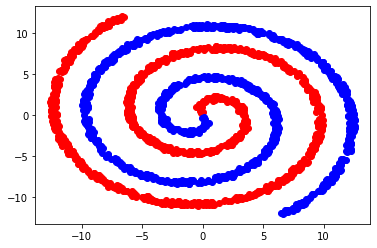

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue')

In [ ]:
def _trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

def plot_dist(data, bins=10):
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    axs = _trim_axs(axs, data.shape[1])

    for i, ax in enumerate(axs):
        ax.hist(data[:, i], bins=bins)
    
    fig.tight_layout()
    plt.show()

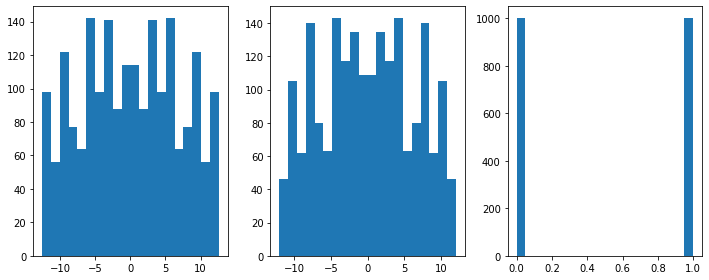

In [ ]:
plot_dist(np.concatenate([X, y.reshape(-1, 1)], axis=1), 20)

## Step 3 - data pre-processing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale X only (Y is binary so it's unnecessary).
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


## Step 4 - train and evaluate

We train the following models here:
1. Dummy model (sanity check).
2. Logistic regression.
3. Decision tree.
4. Random forest.

General approach:
1. Train on the training data (X and y).
2. Make predictions on the test data (X).
3. Compare obtained predictions to the ground truth (y).

Useful classification metrics to take into account:
- accuracy
- precision
- recall
- F1 score

We will also plot confusion matrices to visualise the ratio of type I and type II errors our models make.

              precision    recall  f1-score   support

         0.0       0.48      0.52      0.50       191
         1.0       0.52      0.48      0.50       209

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


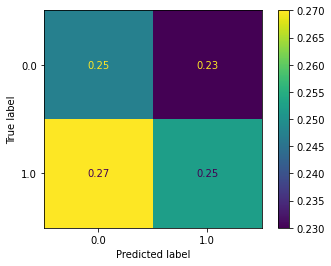

In [ ]:
dc = DummyClassifier()
dc.fit(X_train, y_train)

y_pred_test = dc.predict(X_test)

dc_report = classification_report(y_test, y_pred_test)
print(dc_report)

dc_conf_mat = confusion_matrix(y_test, y_pred_test, labels=dc.classes_, normalize='all')
disp = ConfusionMatrixDisplay(dc_conf_mat, display_labels=dc.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.58      0.66      0.62       191
         1.0       0.65      0.57      0.61       209

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.61       400
weighted avg       0.62      0.61      0.61       400



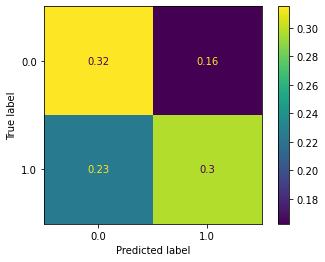

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)

lr_report = classification_report(y_test, y_pred_test)
print(lr_report)

lr_conf_mat = confusion_matrix(y_test, y_pred_test, labels=lr.classes_, normalize='all')
disp = ConfusionMatrixDisplay(lr_conf_mat, display_labels=lr.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       191
         1.0       1.00      0.99      0.99       209

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



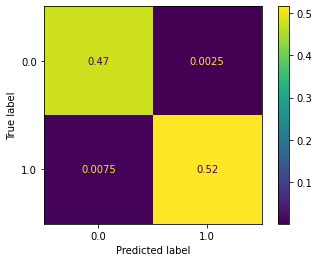

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_test = dt.predict(X_test)

dt_report = classification_report(y_test, y_pred_test)
print(dt_report)

dt_conf_mat = confusion_matrix(y_test, y_pred_test, labels=dt.classes_, normalize='all')
disp = ConfusionMatrixDisplay(dt_conf_mat, display_labels=dt.classes_)
disp.plot()

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       191
         1.0       1.00      1.00      1.00       209

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



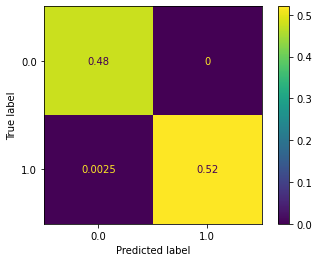

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_test = rf.predict(X_test)

rf_report = classification_report(y_test, y_pred_test)
print(rf_report)

rf_conf_mat = confusion_matrix(y_test, y_pred_test, labels=rf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(rf_conf_mat, display_labels=rf.classes_)
disp.plot()

## Step 5 - hyperparameter search

In [ ]:
clf = DecisionTreeClassifier()
params = {'max_depth': [1, 2, 5, 10, 20, None], 'max_leaf_nodes': [2, 5, 10, 20, 30, None]}
gs = GridSearchCV(clf, params, cv=10)

gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 2, 5, 10, 20, None],
              

In [ ]:
gs.best_params_

{'max_depth': None, 'max_leaf_nodes': 30}

In [ ]:
gs.best_score_

0.9893750000000001

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       191
         1.0       1.00      0.99      0.99       209

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



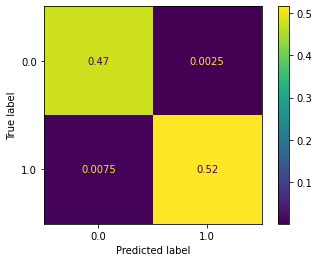

In [ ]:
y_pred_test = gs.predict(X_test)

gs_report = classification_report(y_test, y_pred_test)
print(gs_report)

gs_conf_mat = confusion_matrix(y_test, y_pred_test, labels=gs.classes_, normalize='all')
disp = ConfusionMatrixDisplay(gs_conf_mat, display_labels=gs.classes_)
disp.plot()